In [3]:
import numpy as np
import pandas as pd

In [4]:
base = pd.read_csv('admission.csv', delimiter=';')

In [5]:
base.head()

,Name,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Approval
0,Lucas,337,118,4,4.5,4.5,9.65,1,1
1,Ana,324,107,4,4.0,4.5,8.87,1,1
2,Jose,316,104,3,3.0,3.5,8.00,1,1
3,Carlos,322,110,3,3.5,2.5,8.67,1,1
4,Zileide,314,103,2,2.0,3.0,8.21,0,0


In [6]:
base.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Approval
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,319.333333,107.666667,3.000000,3.277778,3.388889,8.537778,0.666667,0.666667
std,10.758717,5.916080,1.224745,0.939119,0.993031,0.633951,0.500000,0.500000
min,302.000000,101.000000,1.000000,2.000000,1.500000,7.900000,0.000000,0.000000
25%,314.000000,103.000000,2.000000,3.000000,3.000000,8.000000,0.000000,0.000000
50%,321.000000,107.000000,3.000000,3.000000,3.500000,8.210000,1.000000,1.000000
75%,324.000000,110.000000,4.000000,4.000000,4.000000,8.870000,1.000000,1.000000
max,337.000000,118.000000,5.000000,4.500000,4.500000,9.650000,1.000000,1.000000


In [7]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               9 non-null      object 
 1   GRE Score          9 non-null      int64  
 2   TOEFL Score        9 non-null      int64  
 3   University Rating  9 non-null      int64  
 4   SOP                9 non-null      float64
 5   LOR                9 non-null      float64
 6   CGPA               9 non-null      float64
 7   Research           9 non-null      int64  
 8   Approval           9 non-null      int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 776.0+ bytes


In [8]:
X = base.iloc[:, :-1].values
y = base.iloc[:, -1].values

In [9]:
from sklearn.impute import SimpleImputer

In [10]:
base.isnull().sum()

Name                 0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Approval             0
dtype: int64

In [11]:
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

In [12]:
imputer = imputer.fit_transform(X[:, 1:])

### Transformando as variáveis categóricas em numéricas:

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
labelencoder_X = LabelEncoder()

In [15]:
X[:, 0] = labelencoder_X.fit_transform(X[:, 0])

In [16]:
X

array([[6, 337, 118, 4, 4.5, 4.5, 9.65, 1],
       [0, 324, 107, 4, 4.0, 4.5, 8.87, 1],
       [5, 316, 104, 3, 3.0, 3.5, 8.0, 1],
       [1, 322, 110, 3, 3.5, 2.5, 8.67, 1],
       [8, 314, 103, 2, 2.0, 3.0, 8.21, 0],
       [4, 330, 115, 5, 4.5, 3.0, 9.34, 1],
       [3, 321, 109, 3, 3.0, 4.0, 8.2, 1],
       [2, 308, 101, 2, 3.0, 4.0, 7.9, 0],
       [7, 302, 102, 1, 2.0, 1.5, 8.0, 0]], dtype=object)

Foram gerados valores aleatórios para as variáveis categóricas

### Criando Dummies (Calcular o OneHotEncoder)

Com a geração de valores randômicos para as variáveis categóricas, corre o risco do algoritmo reconhecer um valor maior como tendo uma maior importância. Para evitar isso, criaremos valores 'Dummies', que transformarão esses valores em sequências de binários (0 e 1), assim tirando a possibilidade de algum valor ter mais importância que o outro. (Nesse caso, estamos tratando apenas da coluna de variáveis categóricas que foi transformada)

In [17]:
X = X[:, 1:] # como a modificação será feita na primeira coluna, iremos tirar o restante
dummies = pd.get_dummies(X[:, 0]) # perceba que só foi informada a primeira coluna(0) para transformação
X = np.insert(X, 0, dummies.values, axis=1) # inserindo a coluna transformada na variável X

In [18]:
X

array([[0, 0, 0, 0, 0, 0, 0, 0, 1, 337, 118, 4, 4.5, 4.5, 9.65, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 324, 107, 4, 4.0, 4.5, 8.87, 1],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 316, 104, 3, 3.0, 3.5, 8.0, 1],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 322, 110, 3, 3.5, 2.5, 8.67, 1],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 314, 103, 2, 2.0, 3.0, 8.21, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 330, 115, 5, 4.5, 3.0, 9.34, 1],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 321, 109, 3, 3.0, 4.0, 8.2, 1],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 308, 101, 2, 3.0, 4.0, 7.9, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 302, 102, 1, 2.0, 1.5, 8.0, 0]],
      dtype=object)

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [21]:
X_train

array([[0, 0, 0, 0, 0, 0, 1, 0, 0, 314, 103, 2, 2.0, 3.0, 8.21, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 302, 102, 1, 2.0, 1.5, 8.0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 337, 118, 4, 4.5, 4.5, 9.65, 1],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 322, 110, 3, 3.5, 2.5, 8.67, 1],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 316, 104, 3, 3.0, 3.5, 8.0, 1],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 321, 109, 3, 3.0, 4.0, 8.2, 1],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 330, 115, 5, 4.5, 3.0, 9.34, 1]],
      dtype=object)

In [22]:
y_train

array([0, 0, 1, 1, 1, 1, 1], dtype=int64)

In [23]:
X_test

array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 308, 101, 2, 3.0, 4.0, 7.9, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 324, 107, 4, 4.0, 4.5, 8.87, 1]],
      dtype=object)

In [24]:
y_test

array([0, 1], dtype=int64)

In [25]:
from sklearn.naive_bayes import GaussianNB

In [26]:
classificador = GaussianNB()

In [27]:
classificador.fit(X_train, y_train)

GaussianNB()

In [28]:
previsoes = classificador.predict(X_test)

In [29]:
from sklearn.metrics import matthews_corrcoef, accuracy_score, plot_confusion_matrix, plot_precision_recall_curve, average_precision_score, confusion_matrix

import matplotlib.pyplot as plt

In [30]:
matthewsScore = matthews_corrcoef(y_test, previsoes)

In [31]:
print('Precisão com Matthews Correlation Coefficient: {:.1f}'.format(matthewsScore))

Precisão com Matthews Correlation Coefficient: 1.0


In [32]:
print(list('{:.1f}%'.format(cl*100) for cl in classificador.class_prior_))

['28.6%', '71.4%']


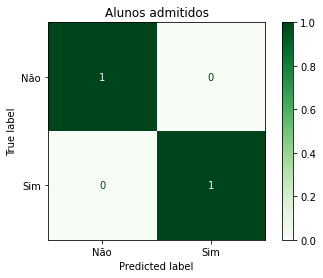

In [33]:
matriz = plot_confusion_matrix(classificador, X_test, y_test, 
display_labels=['Não', 'Sim'], cmap=plt.cm.Greens)
plt.title('Alunos admitidos');

# 0 -> Não 1 -> Sim